<a href="https://colab.research.google.com/github/Siiqueira/Projetos_Python/blob/main/Projeto5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 5


Nesse projeto terar os processos completos de uso de de ML com Scikit-learning

**Abaixo estão as etapas abordadas neste passo a passo do projeto de aprendizado de máquina:**

1. Importando os dados
2. Visualização de dados
3. Limpeza e Transformação de Dados
4. Codificando os dados
5. Dividindo os dados em conjuntos de treinamento e teste
6. Algoritmos de ajuste fino
7. Validação cruzada com KFold
8. Previsão no conjunto de teste

#### 1. Importando os dados

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_test= pd.read_csv('/content/sample_data/test.csv')
df_train = pd.read_csv('/content/sample_data/train.csv')

### 2. Visualizando os dados

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(df_test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [ ]:
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


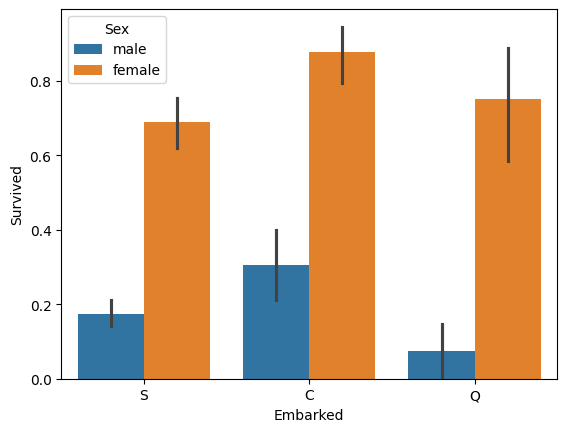

In [ ]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=df_train)
plt.show()

### 3. Limpeza e Transformação de Dados

In [ ]:
def simplify_ages(df):
    if pd.api.types.is_categorical_dtype(df.Age):
        # Se 'Age' já for categórica, adicione -0.5 às categorias se não estiver presente
        if -0.5 not in df.Age.cat.categories:
            df.Age = df.Age.cat.add_categories([-0.5])
        df.Age = df.Age.fillna(-0.5)  # Agora você pode usar fillna com -0.5
    else:
        # Se 'Age' não for categórica, prossiga como antes
        df.Age = df.Age.fillna(-0.5)
        bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
        group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
        categories = pd.cut(df.Age, bins, labels=group_names)
        df.Age = categories
    return df

In [ ]:
def simplify_cabins(df):
  df.Cabin = df.Cabin.fillna('N')
  df.Cabin = df.Cabin.apply(lambda x:x[0])
  return df

In [ ]:
def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

In [ ]:
def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df

In [ ]:
def drop_features(df):
  return df.drop(['Ticket','Name','Embarked'], axis=1)

In [ ]:
def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

In [ ]:
df_train = transform_features(df_train)
df_test = transform_features(df_test)

<ipython-input-11-ebe9893fe987>:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df.Age):
<ipython-input-11-ebe9893fe987>:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df.Age):


### 4. Codificando os dados
  ### 5. Dividindo os dados em conjuntos de treinamento e teste

In [ ]:

from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])

    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

df_train, data_test = encode_features(df_train, df_test)

In [ ]:
from sklearn.model_selection import train_test_split

X_all = df_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = df_train['Survived']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

### 6. Algoritmos de ajuste fino

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier.
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9],
              'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data.
clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/u

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=5, n_estimators=4)

In [ ]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8100558659217877


### 7.Validação cruzada com KFold

In [ ]:
from sklearn.model_selection import KFold # Import KFold from sklearn.model_selection instead of sklearn.cross_validation

def run_kfold(clf):
    kf = KFold(n_splits=10) # The n_folds parameter is deprecated, use n_splits instead
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X_all): # Use kf.split to generate indices
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome))

run_kfold(clf)

Fold 1 accuracy: 0.7555555555555555
Fold 2 accuracy: 0.8651685393258427
Fold 3 accuracy: 0.7865168539325843
Fold 4 accuracy: 0.8539325842696629
Fold 5 accuracy: 0.797752808988764
Fold 6 accuracy: 0.8202247191011236
Fold 7 accuracy: 0.7865168539325843
Fold 8 accuracy: 0.8089887640449438
Fold 9 accuracy: 0.898876404494382
Fold 10 accuracy: 0.8089887640449438
Mean Accuracy: 0.8182521847690387


### 8. Previsão no conjunto de teste

In [ ]:
ids = df_test['PassengerId']
predictions = clf.predict(df_test.drop('PassengerId', axis=1))
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.head()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
